## **Spam Detector Project**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [3]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### **DEA:** Data Exploration and Analysis

In [4]:
## Getting the total length of the daatset
len(data)

4601

In [5]:
# Calculating the Value Counts of the spam column
data['spam'].value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [6]:
data.isna().sum().sort_values(ascending=False).head() * 100/len(data)

word_freq_make       0.0
word_freq_project    0.0
word_freq_857        0.0
word_freq_data       0.0
word_freq_415        0.0
dtype: float64

#### There are NO Nan Values :)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [8]:
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [9]:
# data.describe()
round(data.describe().T,4).head()

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.1046,0.3054,0.0,0.0,0.0,0.00,4.54
word_freq_address,4601.0,0.2130,1.2906,0.0,0.0,0.0,0.00,14.28
word_freq_all,4601.0,0.2807,0.5041,0.0,0.0,0.0,0.42,5.10
word_freq_3d,4601.0,0.0654,1.3952,0.0,0.0,0.0,0.00,42.81
word_freq_our,4601.0,0.3122,0.6725,0.0,0.0,0.0,0.38,10.00


In [10]:
data.nunique()

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

In [11]:
data.nunique().sort_values()

spam                             2
word_freq_table                 38
word_freq_3d                    43
word_freq_parts                 53
word_freq_font                  99
word_freq_conference           106
word_freq_857                  106
word_freq_cs                   108
word_freq_415                  110
word_freq_receive              113
word_freq_addresses            118
word_freq_direct               125
word_freq_telnet               128
word_freq_report               133
word_freq_original             136
word_freq_over                 141
word_freq_make                 142
word_freq_money                143
word_freq_order                144
word_freq_credit               148
word_freq_lab                  156
word_freq_people               158
word_freq_technology           159
word_freq_project              160
word_freq_pm                   163
word_freq_000                  164
word_freq_internet             170
word_freq_address              171
word_freq_remove    

In [12]:
data.value_counts()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  word_freq_order  word_freq_mail  word_freq_receive  word_freq_will  word_freq_people  word_freq_report  word_freq_addresses  word_freq_free  word_freq_business  word_freq_email  word_freq_you  word_freq_credit  word_freq_your  word_freq_font  word_freq_000  word_freq_money  word_freq_hp  word_freq_hpl  word_freq_george  word_freq_650  word_freq_lab  word_freq_labs  word_freq_telnet  word_freq_857  word_freq_data  word_freq_415  word_freq_85  word_freq_technology  word_freq_1999  word_freq_parts  word_freq_pm  word_freq_direct  word_freq_cs  word_freq_meeting  word_freq_original  word_freq_project  word_freq_re  word_freq_edu  word_freq_table  word_freq_conference  char_freq_;  char_freq_(  char_freq_[  char_freq_!  char_freq_$  char_freq_#  capital_run_length_average  capital_run_length_longest  capital_run_length_total  spam
0.00            0.00         

###


## Predict Model Performance

You will be creating and comparing two models on this data: a **Logistic Regression, and a Random Forests Classifier**. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*I think the Random Forest Classifier Model will have a better prediction than Logistic Regression Model based on what Sean said about the versatility and the ubiquity of the Randon Forest model in the Ai and Machine Learning lansdscpe.*

## Split the Data into Training and Testing Sets

In [13]:
# Create the labels set `y` and features DataFrame `X`

# Import Module
from sklearn.model_selection import train_test_split

# Split training and testing sets
# Create the features DataFrame, X
X = data.copy()
X = X.drop(columns='spam') ## dropping the TARGET Column/Category from the dataset

# Create the target DataFrame, y ##Picking up the TARGET Category as y
y = data['spam']

## using the train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
X.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


##### The spam column has been successfully converted to the y target column

In [15]:
display(X_train.head())
display(X_train.tail())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
1173,0.00,0.0,0.00,0.0,0.00,0.00,1.23,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,1.939,0.000,0.000,1.379,8,40
1954,0.67,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.055,0.0,0.000,0.000,0.000,1.644,13,74
256,0.00,0.0,1.42,0.0,0.71,0.00,0.00,0.71,0.00,0.71,...,0.0,0.000,0.000,0.0,0.931,0.000,0.000,12.055,117,217
3341,0.00,0.0,0.24,0.0,0.09,0.04,0.00,0.00,0.04,0.00,...,0.0,0.014,0.148,0.0,0.014,0.044,0.007,2.112,26,1223
4469,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.000,0.000,0.000,1.500,2,3


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
4426,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.0,0.000,0.122,0.081,0.000,0.000,0.04,3.891,70,323
466,0.0,0.23,0.00,0.0,0.23,0.47,0.0,0.47,0.0,0.95,...,0.0,0.000,0.121,0.040,0.000,0.040,0.00,3.780,55,189
3092,0.0,0.00,0.00,0.0,1.49,0.00,0.0,0.00,0.0,0.00,...,0.0,0.000,0.229,0.000,0.000,0.000,0.00,2.333,10,49
3772,0.0,0.23,0.00,0.0,0.00,0.23,0.0,0.46,0.0,0.00,...,0.0,0.063,0.063,0.000,0.159,0.000,0.00,1.616,13,173
860,0.1,0.00,0.41,0.0,0.10,0.10,0.1,0.52,0.1,0.00,...,0.0,0.000,0.048,0.000,0.016,0.064,0.00,1.915,29,339


In [16]:
### Analysis The Splits

x_train_count= X_train.value_counts().sum()
x_test_count = X_test.value_counts().sum()
y_train_count= y_train.value_counts().sum()
y_test_count = y_test.value_counts().sum()

display(x_train_count)
display(y_train_count)
display(x_test_count)
display(y_test_count)


3450

3450

1151

1151

In [17]:
print(f"Training Data Count: {x_train_count/len(data)*100}")
print(f"Testing Data Count: {x_test_count/len(data)*100}")
#{logistic_regression_model.score(X_test, y_test)}")

Training Data Count: 74.98369919582699
Testing Data Count: 25.016300804173007


#### **Observation:** Data split by percentage to Train vs Test >> **75%** to Train vs **25%** to Test

In [18]:
# Split the data into X_train, X_test, y_train, y_test
display(X_train.sum())
display(X_test.sum())

word_freq_make                   353.790
word_freq_address                700.840
word_freq_all                    970.360
word_freq_3d                     203.180
word_freq_our                   1054.100
word_freq_over                   321.950
word_freq_remove                 373.990
word_freq_internet               361.720
word_freq_order                  302.870
word_freq_mail                   818.570
word_freq_receive                204.820
word_freq_will                  1870.040
word_freq_people                 319.690
word_freq_report                 208.690
word_freq_addresses              166.350
word_freq_free                   895.450
word_freq_business               480.720
word_freq_email                  609.250
word_freq_you                   5730.430
word_freq_credit                 268.420
word_freq_your                  2771.200
word_freq_font                   414.390
word_freq_000                    349.740
word_freq_money                  338.380
word_freq_hp    

word_freq_make                   127.260
word_freq_address                279.240
word_freq_all                    320.940
word_freq_3d                      97.840
word_freq_our                    382.440
word_freq_over                   119.290
word_freq_remove                 151.480
word_freq_internet               122.740
word_freq_order                  111.530
word_freq_mail                   282.970
word_freq_receive                 70.430
word_freq_will                   622.330
word_freq_people                 112.480
word_freq_report                  61.050
word_freq_addresses               60.040
word_freq_free                   249.500
word_freq_business               175.320
word_freq_email                  240.760
word_freq_you                   1916.890
word_freq_credit                 125.320
word_freq_your                   954.510
word_freq_font                   143.260
word_freq_000                    117.930
word_freq_money                   95.350
word_freq_hp    

In [19]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

<Axes: title={'center': ' Values Counts of Spam '}, xlabel='spam'>

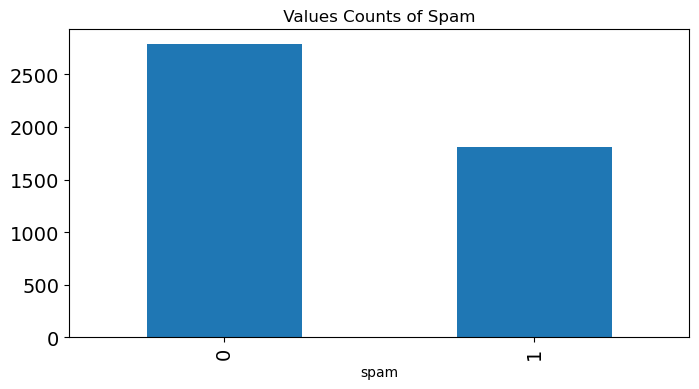

In [20]:
y.value_counts().plot(kind="bar",
   title=" Values Counts of Spam ",
    figsize = (8,4), 
    fontsize = 14,
                 
             )

In [21]:
## Converting Value_Counts of Spams to Percentages
y_pcnt_df = y.value_counts()/len(y)*100
round(y_pcnt_df,2)

spam
0    60.6
1    39.4
Name: count, dtype: float64

<Axes: title={'center': ' Values Counts of Spam by Percentage '}, xlabel='spam'>

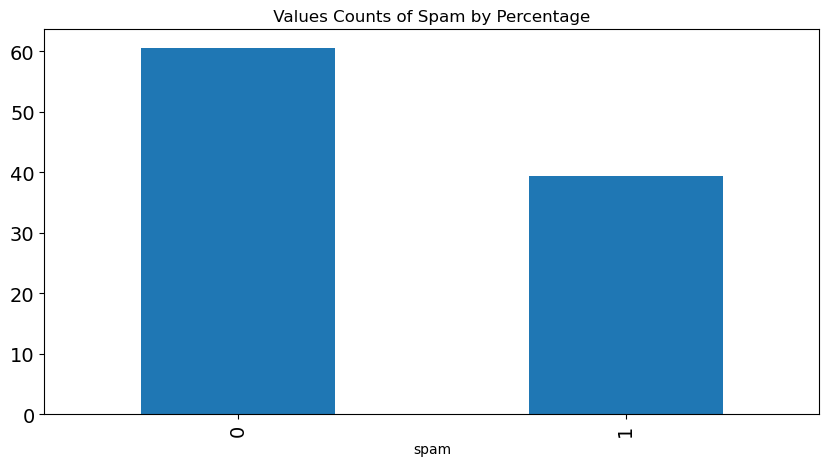

In [22]:
y_pcnt_df.plot(kind="bar",
   title=" Values Counts of Spam by Percentage ",
    figsize = (10,5), 
    fontsize = 14,
                 
             )

##### **Observation:** Value Counts of this dataset based on percentages(%): **60.6%** vs **39.4%** >> "0" vs "1"

####

## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [23]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler

# Fit the Standard Scaler with the training data
scaler = StandardScaler().fit(X_train, X_test)

# Scale the training data


In [24]:
x_train_scaled = scaler.transform(X_train)
x_train_scaled

array([[-0.33933373, -0.16214839, -0.55144324, ..., -0.11649103,
        -0.21175305, -0.41909144],
       [ 1.8777157 , -0.16214839, -0.55144324, ..., -0.10814021,
        -0.18841316, -0.35960578],
       [-0.33933373, -0.16214839,  2.2325961 , ...,  0.21993678,
         0.29705664, -0.10941609],
       ...,
       [-0.33933373, -0.16214839, -0.55144324, ..., -0.08642808,
        -0.20241709, -0.40334524],
       [-0.33933373,  0.02143809, -0.55144324, ..., -0.10902256,
        -0.18841316, -0.18639753],
       [-0.00843083, -0.16214839,  0.25239911, ..., -0.09960031,
        -0.1137255 ,  0.10403246]])

In [25]:
x_test_scaled = scaler.transform(X_test)
x_test_scaled

array([[-0.33933373, -0.16214839, -0.55144324, ..., -0.12843428,
        -0.2444289 , -0.48382584],
       [ 2.01007686, -0.16214839,  0.84057643, ..., -0.12742588,
        -0.23976092, -0.43308807],
       [-0.33933373, -0.16214839,  1.23269465, ..., -0.11835027,
        -0.21642103, -0.30886801],
       ...,
       [-0.1077017 ,  0.01345607,  1.05624145, ..., -0.05189034,
         0.09633355,  1.21501465],
       [-0.33933373, -0.16214839, -0.55144324, ..., -0.10952676,
        -0.23042497, -0.47507794],
       [-0.33933373, -0.16214839, -0.23774866, ..., -0.07788818,
        -0.11839347,  0.83710575]])

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [26]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()

# Fit the model
logistic_regression_model.fit(X_train, y_train)


c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# Make and save testing predictions with the saved logistic regression model using the test data

# Review the predictions

# Score the model
print(f"Training Data Score: {logistic_regression_model.score(X_train, y_train)*100:.2f}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test, y_test)*100:.2f}")

Training Data Score: 91.86
Testing Data Score: 92.62


In [28]:
### Overfitting Measure
lg_train_df = logistic_regression_model.score(X_train,y_train)
lg_test_df = logistic_regression_model.score(X_test, y_test)
lr_model_overfitting_df = (lg_test_df - lg_train_df)
display(lr_model_overfitting_df)
display(lr_model_overfitting_df*100)

0.00760044825545525

0.760044825545525

In [29]:
##Overfittingn in %
round(lr_model_overfitting_df*100,2)

0.76

In [30]:
print(f"Logistic Model Train_Test OverFitting:  {lr_model_overfitting_df*100:.2f}%")

Logistic Model Train_Test OverFitting:  0.76%


#### Logistic model train_test overfitting of **0.76%** makes lr a good model for this project because it is expected to perform better with less halucination in production due to the tight train_test overfitting score.

### Predict Testing Labels...

In [31]:
# Generate predictions from the model we just fit
predictions = logistic_regression_model.predict(X_train)

# Convert those predictions (and actual values) to a DataFrame
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_train})
results_df.head()

,Prediction,Actual
1173,1,1
1954,0,0
256,1,1
3341,0,0
4469,0,0


In [32]:
# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Actual Targets": y_test})

In [33]:
results_df#.head()

,Testing Data Predictions,Testing Data Actual Targets
3683,0,0
4412,0,0
2584,0,0
69,1,1
1844,0,0
...,...,...
1912,0,0
1260,1,1
801,1,1
2698,0,0


In [34]:
#Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Calculate the model's accuracy on the test dataset
#accuracy_score(y_test, testing_predictions)# 
print(f"Logistic Regression Prediction Accuracy: {accuracy_score(y_test, testing_predictions):.5f}")

Logistic Regression Prediction Accuracy: 0.92615


In [35]:
##Testing Accuracey as percentage
lr_accuracy_df = accuracy_score(y_test, testing_predictions)*100
#round(lr_accuracy_df,2)
print(f"Logistic Regression Prediction Accuracy: {lr_accuracy_df:.2f}%")


Logistic Regression Prediction Accuracy: 92.62%


In [36]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.

#### ***LR Prediction Accuracy Score: 92.62%*** 

####

## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [37]:
# Train a Random Forest Classifier model and print the model score
#from sklearn.ensemble import RandomForestClassifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()

# Fit the model
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
# Review the predictions

In [40]:
print(f"Training Data Score: {random_forest_model.score(X_train, y_train)}")
print(f"Testing Data Score: {random_forest_model.score(X_test, y_test)}")

Training Data Score: 0.9994202898550725
Testing Data Score: 0.9574283231972198


In [41]:
training_data_df= print(f"Training Data Score: {random_forest_model.score(X_train, y_train)*100:.2f}")
testing_data_df = print(f"Testing Data Score: {random_forest_model.score(X_test, y_test)*100:.2f}")


Training Data Score: 99.94
Testing Data Score: 95.74


In [42]:
### Overfitting Measure
rf_model_overfitting_df = (random_forest_model.score(X_train, y_train))-(random_forest_model.score(X_test, y_test))
#round(rf_model_overfitting_df*100,2)
print(f"Random Forest Train_Test OverFitting: {rf_model_overfitting_df*100:.2f}%")

Random Forest Train_Test OverFitting: 4.20%


##### The significant difference (about 4%) between training and testing scores implies that RF model may be less reliable in production.


####

### Calculating the Predictions

In [43]:
# Generate predictions from the model we just fit
predictions = random_forest_model.predict(X_train)

# Convert those predictions (and actual values) to a DataFrame
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_train})
results_df.head(10)

,Prediction,Actual
1173,1,1
1954,0,0
256,1,1
3341,0,0
4469,0,0
1151,1,1
1924,0,0
647,1,1
2468,0,0
2836,0,0


In [44]:
# Apply the fitted model to the `test` dataset
testing_predictions = random_forest_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Actual Targets": y_test})

In [45]:
results_df

,Testing Data Predictions,Testing Data Actual Targets
3683,0,0
4412,0,0
2584,0,0
69,1,1
1844,0,0
...,...,...
1912,0,0
1260,1,1
801,1,1
2698,0,0


In [49]:
#Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Calculate the model's accuracy on the test dataset
random_forest_df = accuracy_score(y_test, testing_predictions)*100 
#random_forest_df 
print(f"Random Forest Accuracy Score: {random_forest_df:.2f}%")

Random Forest Accuracy Score: 95.74%


####

## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

In [47]:
display(lr_accuracy_df)
display(lr_model_overfitting_df*100)

display(random_forest_df)
display(rf_model_overfitting_df*100 )

92.61511728931364

0.760044825545525

95.74283231972198

4.199196665785266

##### LOGISTIC REGRESSION vs RANDOM FOREST CLASSIFIER STATS

In [55]:
# OVERFIT == when TRAIN Score - TEST Score Greater than 1%

print( "\nLOGISTIC REGRESSION STATS:")
print(f"LogR Training Data Score:     {logistic_regression_model.score(X_train, y_train)*100:.2f}")
print(f"LogR Testing Data Score:      {logistic_regression_model.score(X_test, y_test)*100:.2f}")
print(f"LogR Train-Test OverFitting:  {lr_model_overfitting_df*100:.2f}% > (Not Overfit)")
print(f"Logistic Regression Accuracy: {lr_accuracy_df:.2f}%")
print( ".......\n")

print( "RANDOM FOREST CLASSIFIER STATS:")
print(f"RF Training Data Score:        {random_forest_model.score(X_train, y_train)*100:.2f}")
print(f"RF Testing Data Score:         {random_forest_model.score(X_test, y_test)*100:.2f}")
print(f"RF Mod Train-Test OverFitting: {rf_model_overfitting_df*100:.2f}% > (Overfit)")
print(f"Random Forest Model Accuracy:  {random_forest_df:.2f}%")


LOGISTIC REGRESSION STATS:
LogR Training Data Score:     91.86
LogR Testing Data Score:      92.62
LogR Train-Test OverFitting:  0.76% > (Not Overfit)
Logistic Regression Accuracy: 92.62%
.......

RANDOM FOREST CLASSIFIER STATS:
RF Training Data Score:        99.94
RF Testing Data Score:         95.74
RF Mod Train-Test OverFitting: 4.20% > (Overfit)
Random Forest Model Accuracy:  95.74%


#### **Observations and Inferences:** 
* RandomForestClassifier (RF) outperformed Logistic Regression Model with **96.00** accuracy, that is **3%** (96.0 - 92.6) better than LR. However, RF has a much higher Train_Test overfitting of almost **4%**, compared to **0.76%** for LR. 
 
* Logistic Regression (LR) has a slighly lower accuracy score of **92.6%** and a very tight Train_test overfiiting of less than 1% **(0.76%)**.

* It is noteworthy that the **Tests Scores == Model Accuracy Scores.**  
  
* Therefore, based on these observations, Logistic Regresssion model will probably be more reliable in producion, due to its much smaller train_test overfitting results, than the Randomforest classifier with a much higher accuracy score and a train_test score differentials*

### The End. Thank You :)